# **Netzwerksicherheit**

# Netzwerkmonitoring

## Ziele und Motivation

- Überwachung und regelmäßige Kontrolle von Netzwerken, deren Hardware (z. B. Server, Router, Switches), Diensten (z. B. Webserver, E-Mail-Dienste) und Ereignissen
- Bestimmung der Netzelemente, deren Services, deren Status und Interaktionen, der Netztopologie sowie des Routings
- Aufspüren fehlerhafter Hardware- und Software-Komponenten, Überlastungen, Verbindungsunterbrechungen und andere Störungen der Datenübertragung
- Ausgangspunkt für die Risikoabschätzung und die Planung von Schutzmaßnahmen

## Packet Capture

- Packet Capture = Sammeln von Datenpaketen aus dem Netzwerkverkehr
- Unabhängig von der Adressierung der Datenpakete
- Werkzeug: Packet Sniffer bzw. Packet Analyzer
- Ausführung als Software oder Hardware möglich

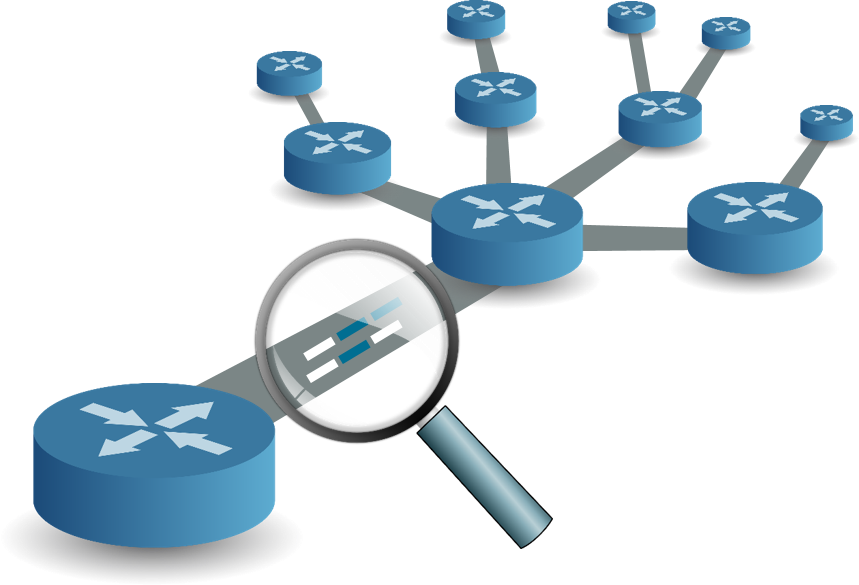</img>

## Wireshark
- Sniffer: Mitschneiden, Darstellung und Analyse des Netzwerkverkehrs
- Einsatz als Netzwerk-Analyse-Tool
- Paketorientierte Arbeitsweise
- Arbeitet auf Live-Daten oder aufgezeichnet Daten

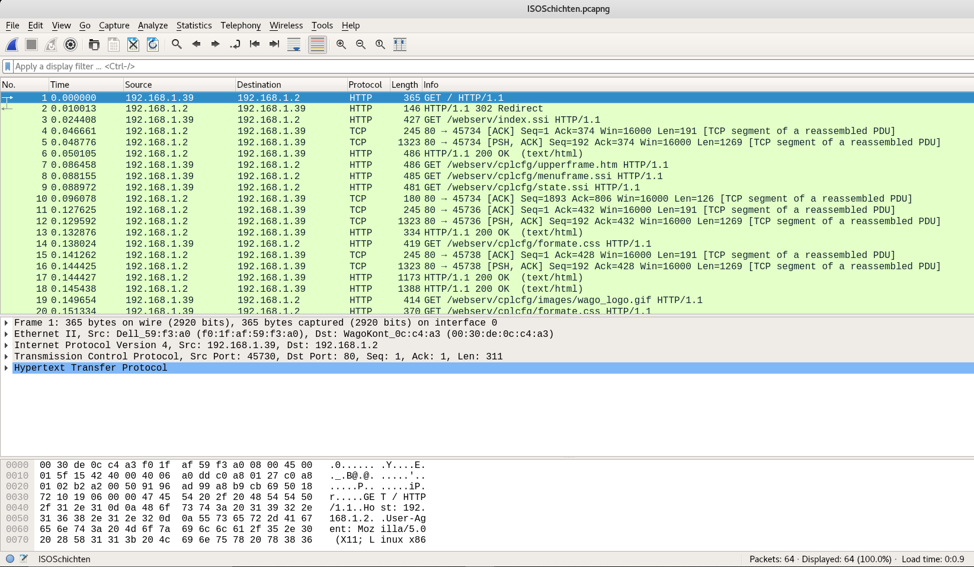</img>

### Analyse der ISO/OSI-Schichten
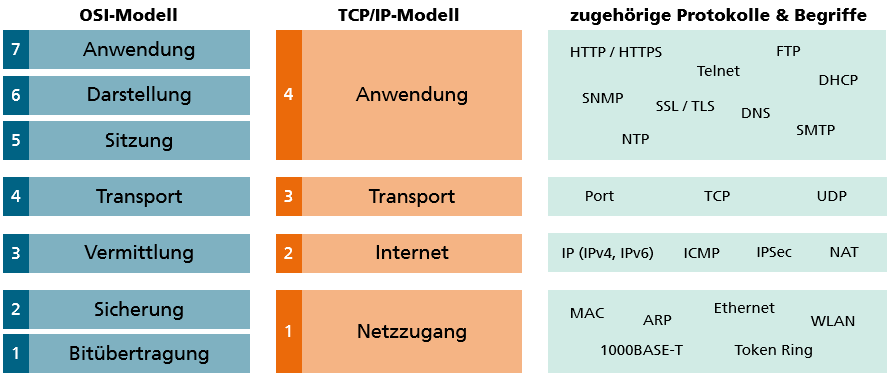</img>

### Analyse der ISO/OSI-Schichten
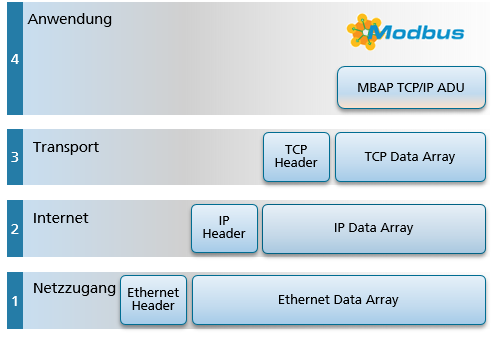</img>

### Paketdetails-Fenster
- IP-Adressen: 
    - Sender: **192.168.1.39**
    - Empfänger: **192.168.1.2**
- Verwendendes Protokoll: **HTTP**
- Paketlänge: **365 Bytes**

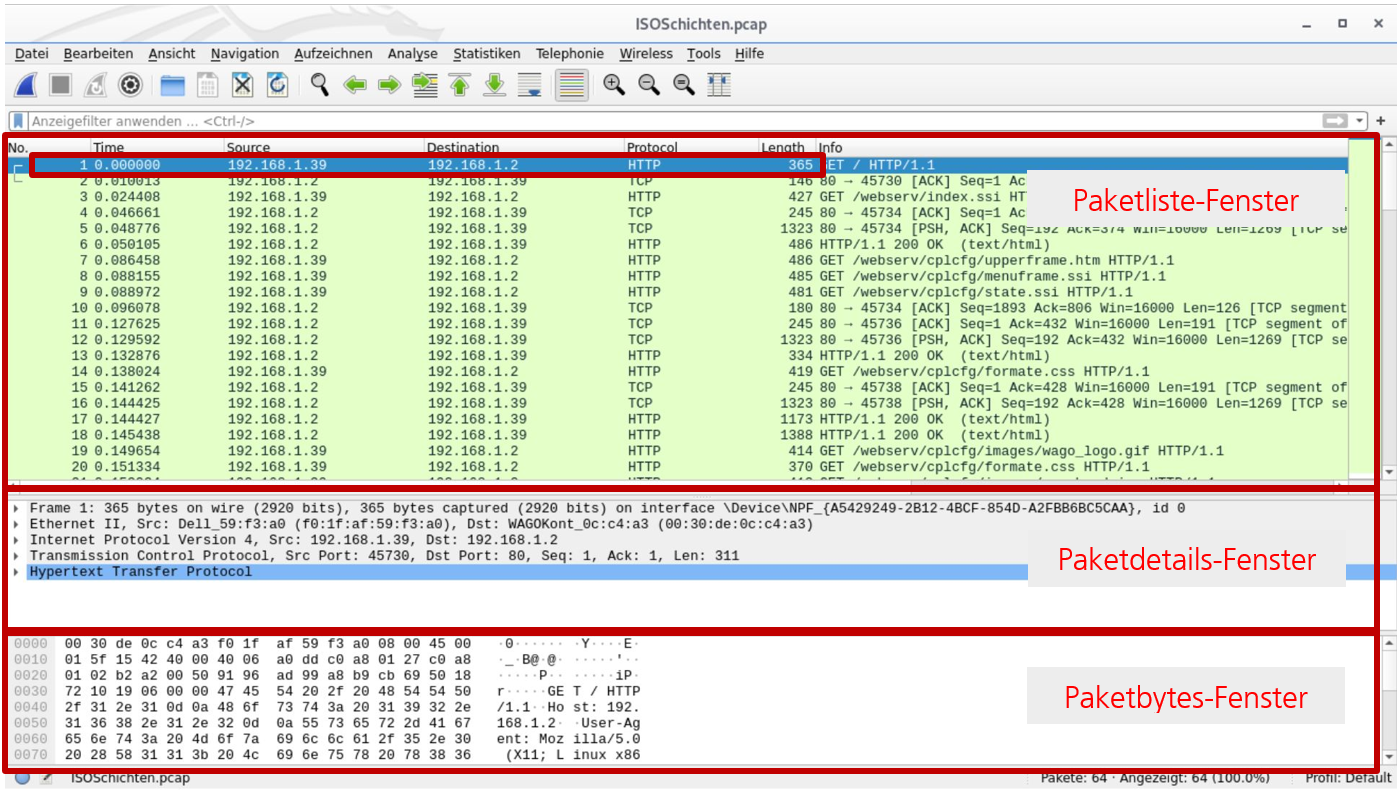</img>

- Port-Nummer des Dell-Gerätes (Webbrowser): **45738**

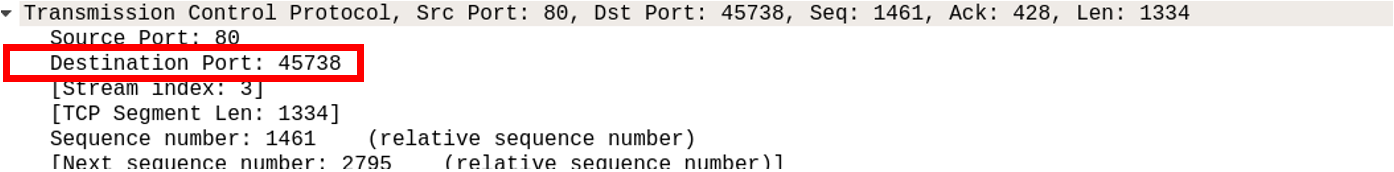</img>

- HTTP-Paket beinhaltet HTML-Code für die Darstellung der Informationen auf Webseite

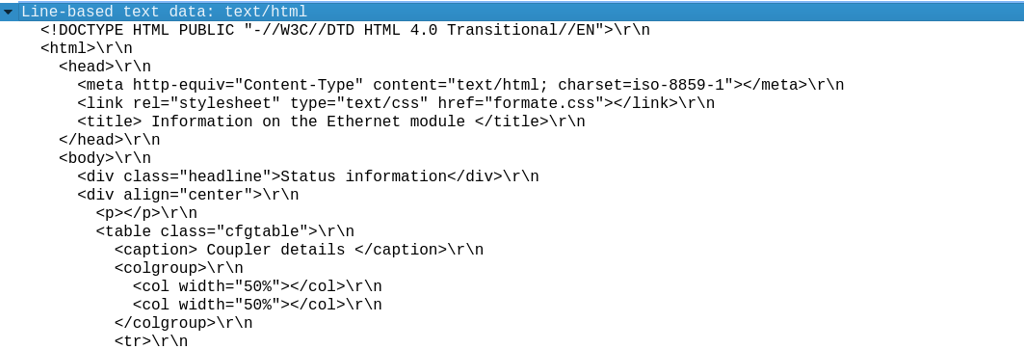</img>

## Netzwerkmonitoring mit Python
- Manuelle Analyse der Pakete mit eigenem Quellcode:
    - Übersetzung und Auswertung einzelner Bytes im Netzwerkpaket
    - Spezifische Kenntnisse über die Struktur der Internetprotokolle notwendig

In [1]:
# Unpacks TCP segment
def tcp_segment(data):
   (src_port, dest_port, sequence, acknowledgment, offset_reserved_flags) = struct.unpack('! H H L L H', data[:14])
   offset = (offset_reserved_flags >> 12) * 4
   flag_urg = (offset_reserved_flags & 32) >> 5
   flag_ack = (offset_reserved_flags & 16) >> 4
   flag_psh = (offset_reserved_flags & 8) >> 3
   flag_rst = (offset_reserved_flags & 4) >> 2
   flag_syn = (offset_reserved_flags & 2) >> 1
   flag_fin = offset_reserved_flags & 1
   return src_port, dest_port, sequence, acknowledgment, flag_urg, flag_ack, flag_psh, flag_rst, flag_syn, flag_fin, data[offset:]

- **Verwendung von Python-Bibliotheken**

### Scapy

- Python-Programm und -Bibliothek zur Bearbeitung von Netzwerkpaketen:
    - Senden, Lesen, Zerlegen, Fälschen
- Ermöglicht den Bau von Tools, die Netzwerke untersuchen, scannen oder angreifen können
- [https://scapy.net/](https://scapy.net/)

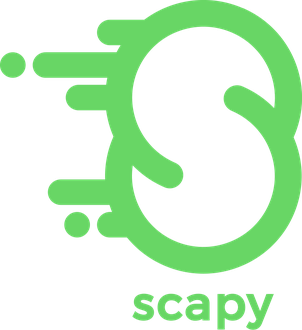</img>

### Scapy Cheatsheet

Bezeichnung von Schichten (layers) in Scapy:
- 1: Netzzugang (Ethernet): **Ether**
- 2: Internet: z. B. **IP**
- 3: Transport: z. B. **TCP**
- 4: Anwendung: z. B. **HTTP**, **HTTPRequest**, **HTTPResponse**



Methoden und Datenfelder im Paket: 
- ```packet.haslayer(SCHICHT_NAME)``` &#8594; Prüfung, ob ein Paket die gesuchte Schicht beinhaltet
- ```packet.getlayer(SCHICHT_NAME)```&#8594; Zugriff auf die gesuchte Schicht (mit Schicht-Header und Payload)
- ```packet.getlayer(IP).proto``` &#8594; Beispiel Abfrage des Protokol-Typ in der Transportschicht
- ```packet.show()``` &#8594; Menschenlesbare Informationen über ein Paket 
- Auszug der Attribute pro Schicht:
    - ```.payload``` &#8594; Payload-Daten ohne Schicht-Header
    - ```.src``` &#8594; Quelladresse
    - ```.dst``` &#8594; Zieladresse
    - ```.sport``` &#8594; Quellport
    - ```.dport``` &#8594; Zielport